#Support Vector Machine (Supervised Machine Learning)
##Support Vector Machine is a supervised machine learning algorithm used primarily for:

**Classification (e.g., spam detection, image recognition)**

**Regression (SVR – Support Vector Regression)**

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

##Load the dataset

In [6]:
digits = load_digits()

## Explore the Structure of the Digits Dataset


In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## View and Convert the Digits Dataset to a Pandas DataFrame for better visualization


In [8]:
print(digits.data)
df1 = pd.DataFrame(digits.data)
df1

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


##Or you can do this

In [9]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


##Also append the target column to the dataframe

In [10]:
df["Target"] = digits.target

df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


##Import essential libraries

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


## Define Features and Target, then Perform Train-Test Split


In [12]:
X = df.drop('Target' , axis = 'columns')
y = df['Target']

#X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Train and Evaluate the Support Vector Classifier (SVC)


In [13]:
model = SVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9888888888888889

In [14]:
result = model.predict(X_test)

result

array([1, 0, 0, 0, 4, 0, 3, 8, 2, 1, 8, 4, 8, 3, 8, 2, 9, 8, 5, 5, 8, 6,
       6, 3, 0, 0, 3, 0, 3, 7, 1, 0, 2, 4, 3, 1, 3, 4, 5, 5, 7, 5, 3, 7,
       7, 1, 6, 9, 0, 7, 2, 3, 2, 1, 0, 4, 3, 1, 6, 9, 1, 1, 6, 4, 0, 1,
       1, 5, 3, 5, 3, 5, 5, 1, 1, 0, 2, 1, 6, 9, 0, 6, 5, 2, 7, 9, 6, 0,
       5, 0, 6, 7, 1, 9, 8, 8, 4, 0, 3, 1, 7, 7, 4, 7, 7, 8, 1, 6, 1, 2,
       4, 5, 2, 8, 3, 7, 7, 5, 9, 4, 4, 5, 1, 9, 9, 3, 3, 9, 6, 8, 1, 1,
       9, 6, 0, 3, 2, 1, 6, 9, 6, 1, 7, 9, 6, 9, 4, 9, 6, 0, 6, 4, 6, 5,
       4, 2, 2, 3, 4, 2, 7, 2, 2, 8, 4, 9, 6, 8, 5, 6, 5, 0, 8, 2, 7, 7,
       1, 7, 1, 3, 7, 4, 1, 7, 3, 1, 2, 3, 3, 5, 8, 9, 9, 5, 6, 0, 6, 8,
       8, 2, 3, 2, 8, 6, 9, 2, 3, 9, 1, 5, 0, 0, 5, 6, 2, 4, 3, 6, 6, 1,
       0, 2, 5, 5, 1, 0, 4, 2, 5, 6, 4, 0, 5, 0, 2, 5, 9, 7, 7, 3, 7, 9,
       7, 1, 4, 5, 8, 7, 5, 4, 6, 0, 7, 2, 9, 9, 4, 4, 4, 3, 2, 7, 3, 4,
       8, 1, 9, 6, 8, 7, 8, 2, 3, 2, 3, 1, 8, 3, 4, 1, 1, 0, 7, 7, 3, 0,
       5, 6, 4, 6, 2, 5, 2, 1, 4, 2, 4, 3, 6, 6, 0,

##Plot the digits images to better visualize them

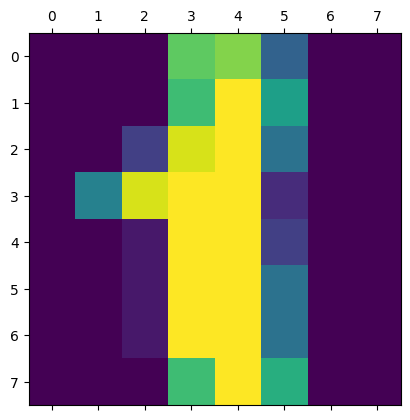

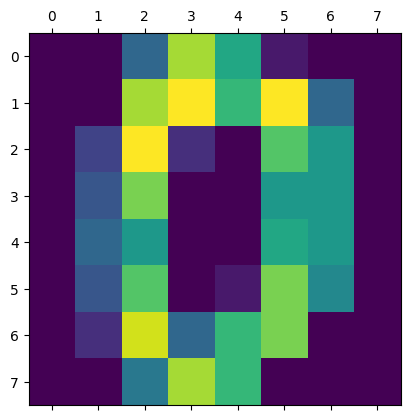

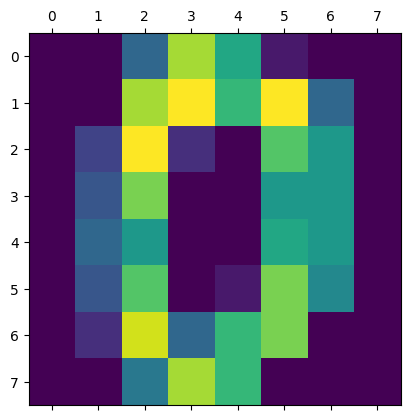

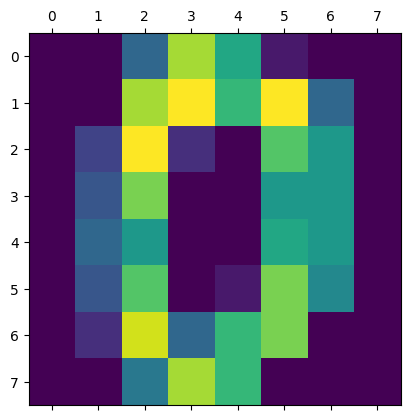

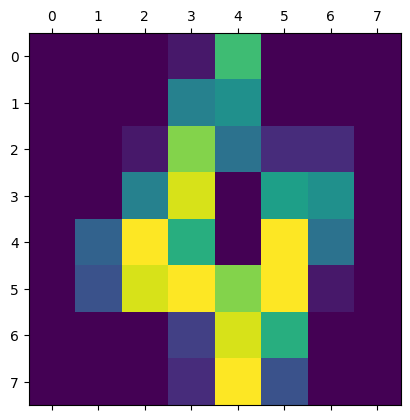

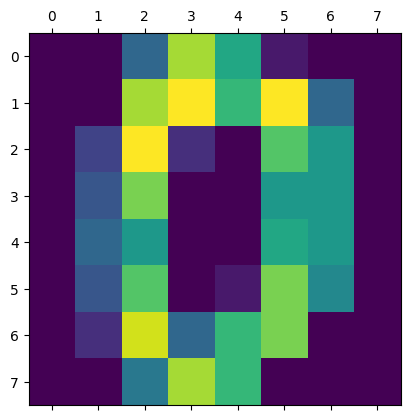

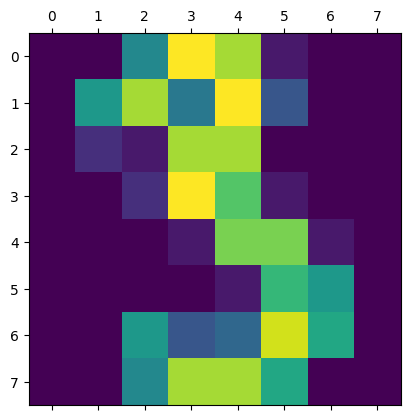

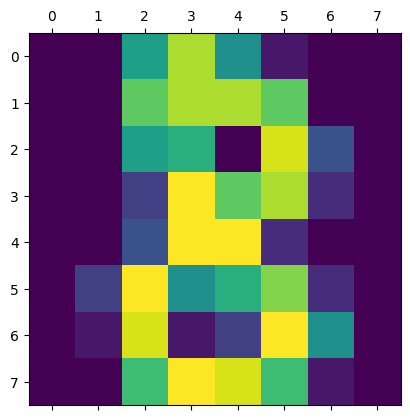

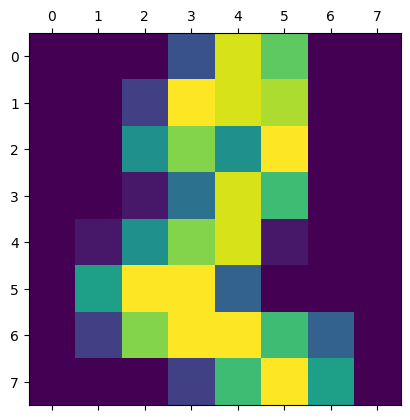

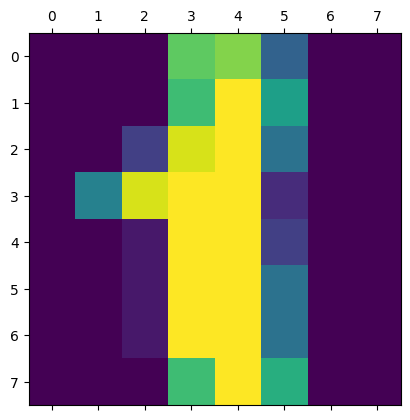

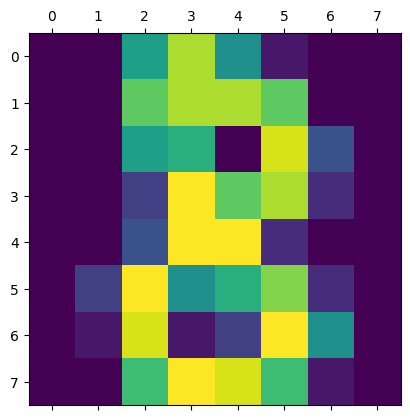

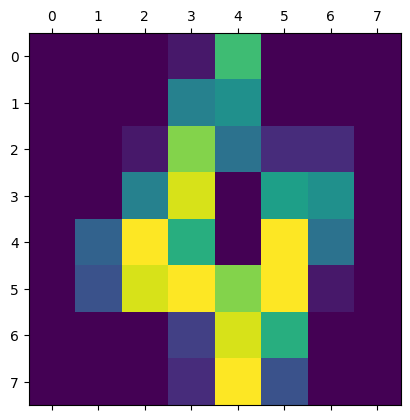

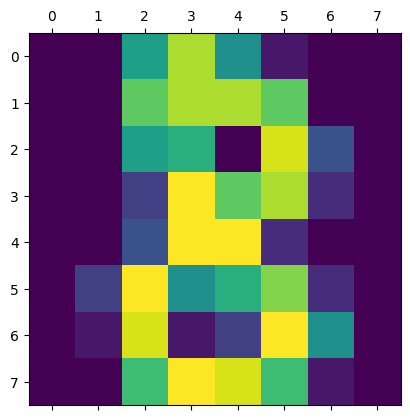

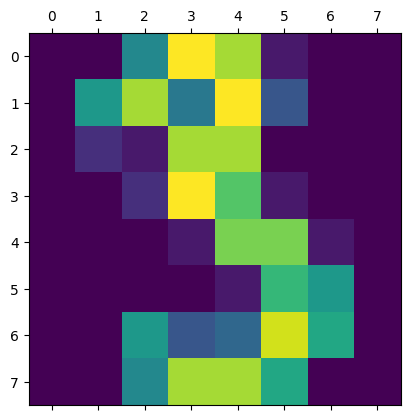

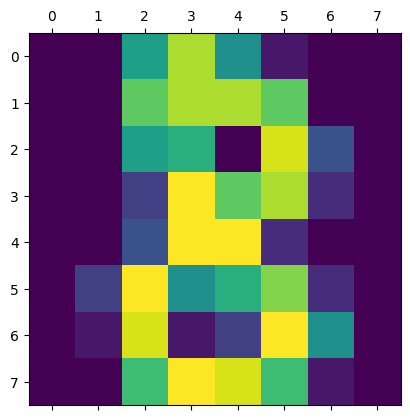

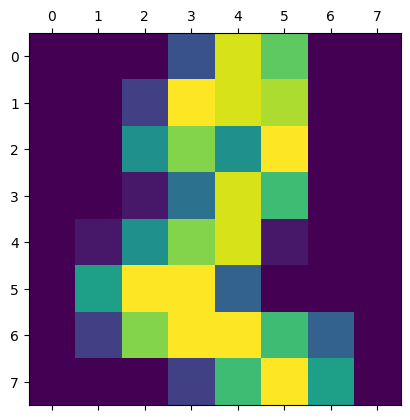

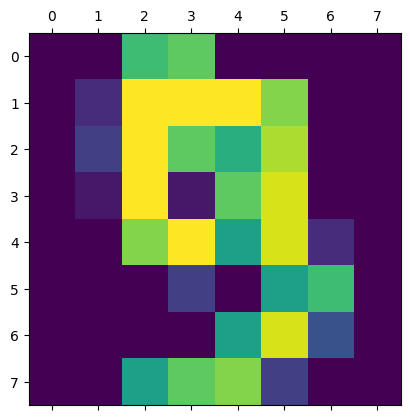

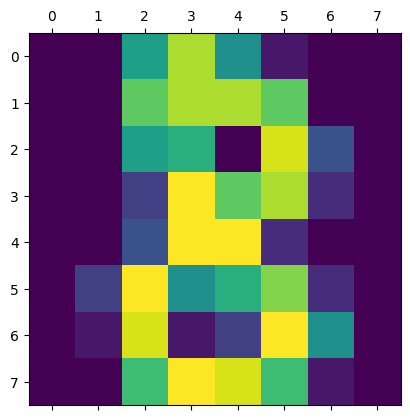

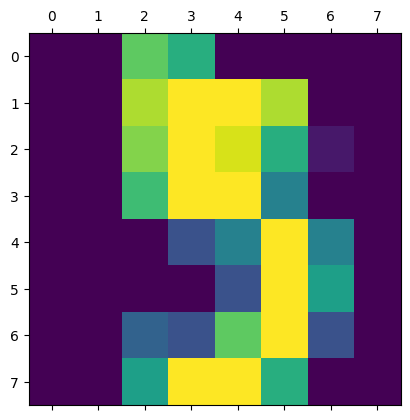

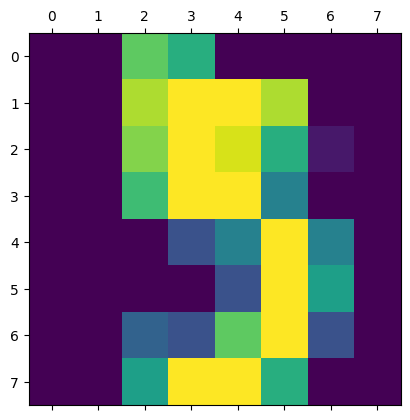

In [15]:
for i in range(20):
    plt.matshow(digits.images[result[i]])

## Excellent, now try changing the test size and train the model on Support Vector Classifier to identify how test and train size variation can increase/decrease model accuracy.

In [16]:
#Start here
#X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [17]:
model = SVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9833333333333333

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4)

In [19]:
model = SVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9902642559109874

In [21]:
#X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [22]:
model = SVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9911111111111112